In [51]:
# Importando bibliotecas

import os
import glob
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt    

np.random.seed(20)

In [52]:
# Definindo diretório

os.chdir(r"D:\Documents\Scripts\TCC\Hits\Dataset\Bases Usadas No Modelo")

In [53]:
# Loop para pegar todos os nomes dos CSV

extensao = 'csv'
arquivos = [i for i in glob.glob('*.{}'.format(extensao))]

arquivos

['FINAL_dataset-of-00s.csv', 'FINAL_dataset-of-10s.csv']

In [54]:
# Juntando os arquivos em um só 

data = pd.concat([pd.read_csv(f) for f in arquivos ])
data.reset_index(drop=True, inplace=True)

In [55]:
# Selecionando as colunas que servirão como parâmetro no modelo
    
y = data.target
x = data[['danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit','sections']]

In [56]:
# Divisão do modelo em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=5)

### RANDOM FOREST

In [57]:
# Criando o modelo

modelo = RandomForestClassifier(n_estimators=500, criterion='gini', random_state = 0) 
modelo = modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1384
           1       0.86      0.92      0.88      1689

    accuracy                           0.87      3073
   macro avg       0.87      0.86      0.87      3073
weighted avg       0.87      0.87      0.87      3073



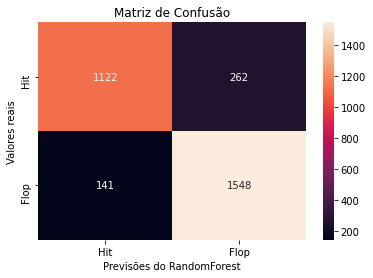

In [58]:
# Matriz de confusão

y_pred = modelo.predict(x_test)

cf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Previsões do RandomForest');ax.set_ylabel('Valores reais'); 
ax.set_title('Matriz de Confusão'); 
ax.xaxis.set_ticklabels(['Hit', 'Flop']); ax.yaxis.set_ticklabels(['Hit', 'Flop']);

In [59]:
# Validando a importância de cada parâmetro

parametros = modelo.feature_importances_
parametros

array([0.11736678, 0.07936671, 0.0211273 , 0.0973125 , 0.0059749 ,
       0.04288718, 0.0924624 , 0.25670086, 0.03850325, 0.05908559,
       0.03528991, 0.08697533, 0.00465365, 0.03505192, 0.02724171])

In [60]:
# Classificando os parâmetros por sua importância no modelo

sorted(zip(modelo.feature_importances_, x.columns), reverse=True)

[(0.2567008637368943, 'instrumentalness'),
 (0.11736678452141436, 'danceability'),
 (0.09731250401431281, 'loudness'),
 (0.09246240202395288, 'acousticness'),
 (0.08697532736405224, 'duration_ms'),
 (0.07936670676598916, 'energy'),
 (0.05908558762752952, 'valence'),
 (0.042887179476228506, 'speechiness'),
 (0.03850325121179015, 'liveness'),
 (0.035289911772094194, 'tempo'),
 (0.03505192299839428, 'chorus_hit'),
 (0.027241710261753385, 'sections'),
 (0.021127300722229705, 'key'),
 (0.0059749011482830286, 'mode'),
 (0.0046536463550815475, 'time_signature')]